In [1]:
%%capture --no-display

import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# spectrome imports
from spectrome.brain import Brain
from spectrome.utils import functions, path
from spectrome.forward import eigenmode, get_complex_laplacian

# widget imports:
import nibabel as nib
from surfer import Brain as SB
from ipywidgets import interactive, widgets, fixed

## Examing and rendering brains for best eigenmode matches

In [2]:
%matplotlib inline

# House keeping
plt.style.use('seaborn')
data_dir = '../../data/'
hcp_dir = "../../data"

# Load Pablo's Yeo 2017 canonical network maps
com_dk = np.load(
    "../../data/com_dk.npy",
    allow_pickle = True
).item()
DK_df_normalized = pd.read_csv(
    "../../data/DK_dictionary_normalized.csv"
).set_index("Unnamed: 0")

# binarize:
ub, lb = 1, 0 #define binary boundaries

DKfc_binarized = pd.DataFrame(
    [], index=DK_df_normalized.index, columns=DK_df_normalized.columns
)
for name in DK_df_normalized.index:
    u = np.mean(np.nan_to_num(DK_df_normalized.loc[name].values))
    s = np.std(np.nan_to_num(DK_df_normalized.loc[name].values))
    threshold = u - s * 0.1
    DKfc_binarized.loc[name] = np.where(
        DK_df_normalized.loc[name].values > threshold, ub, lb
    )

### Loading Basin Hopping results:
Start with Default network DICE:

In [8]:
colnames = ['Fun','x']
indnames = [0,1,2,3,4,5,6,7,8,9]
nruns = 10
default_evals = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = path.get_file_path('laplacian_networks/Default{}_BH_dice.h5'.format(i))
    bh_default = path.read_hdf5(h5_path)
    default_evals.at[i,'Fun'] = bh_default['fun']
    default_evals.at[i,'x'] = np.round(bh_default['x'],3)
    
default_evals.style.apply(functions.highlight_min, subset=pd.IndexSlice[:,'Fun'])

,Fun,x
0,0.429,[14.518 0.065 7.521]
1,0.429,[18.36 2.665 9.609]
2,0.429,[39.97 3.606 20.652]
3,0.333,[31.995 4.647 3.533]
4,0.429,[18.726 0.653 9.67 ]
5,0.429,[10.536 1.905 5.471]
6,0.423,[9.028 4.418 2.394]
7,0.429,[19.589 3.572 10.166]
8,0.412,[30.949 2.997 7.966]
9,0.412,[44.552 1.022 11.485]


Pearson's correlation:

In [16]:
default_corrs = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = path.get_file_path('laplacian_networks/Default{}_BH_corr.h5'.format(i))
    bh_default = path.read_hdf5(h5_path)
    default_corrs.at[i,'Fun'] = bh_default['fun']
    default_corrs.at[i,'x'] = np.round(bh_default['x'],3)
    
default_corrs.style.apply(functions.highlight_max, subset=pd.IndexSlice[:,'Fun'])

OSError: ``/home/axiezai/lab/brain-scfc/spectrome/spectrome/data/laplacian_networks/Default0_BH_corr.h5`` does not exist

Dorsal Attention:

In [9]:
dorsal_evals = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = path.get_file_path('laplacian_networks/Dorsal_Attention{}_BH_dice.h5'.format(i))
    bh_dorsal = path.read_hdf5(h5_path)
    dorsal_evals.at[i,'Fun'] = bh_dorsal['fun']
    dorsal_evals.at[i,'x'] = np.round(bh_dorsal['x'],3)

dorsal_evals.style.apply(functions.highlight_min, subset=pd.IndexSlice[:,'Fun'])

,Fun,x
0,0.5,[ 3.417 3.583 13.725]
1,0.5,[ 3.205 4.271 12.878]
2,0.511,[ 3.269 0.794 12.562]
3,0.512,[30.25 3.727 7.232]
4,0.463,[18.826 3.725 7.445]
5,0.535,[2.963 4.318 7.989]
6,0.349,[11.34 2.549 0.885]
7,0.5,[ 3.972 1.314 15.954]
8,0.463,[23.91 1.652 9.462]
9,0.463,[24.623 0.028 9.768]


In [ ]:
# Draw:
h5_path = path.get_file_path('Dorsal_Attention3_BH_dice.h5')
bh_dorsal = path.read_hdf5(h5_path)
d3 = [bh_dorsal['LinRegResults'][i]['r2score'] for i in range(len(bh_dorsal['LinRegResults']))]

h5_path = path.get_file_path('Dorsal_Attention4_BH_dice.h5')
bh_dorsal = path.read_hdf5(h5_path)
d4 = [bh_dorsal['LinRegResults'][i]['r2score'] for i in range(len(bh_dorsal['LinRegResults']))]

print(d3)
print(d4) # pick d4 cuz 0.0513 vs 0.0518

Frontoparietal:

In [11]:
front_evals = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = path.get_file_path('laplacian_networks/Frontoparietal{}_BH_dice.h5'.format(i))
    bh_front = path.read_hdf5(h5_path)
    front_evals.at[i,'Fun'] = bh_front['fun']
    front_evals.at[i,'x'] = np.round(bh_front['x'],3)

front_evals.style.apply(functions.highlight_min, subset=pd.IndexSlice[:,'Fun'])

,Fun,x
0,0.529,[ 1.873 1.47 12.451]
1,0.509,[10.252 3.341 13.877]
2,0.48,[26.222 2.08 16.311]
3,0.358,[28.37 0.875 4.315]
4,0.358,[19.234 0.924 2.873]
5,0.358,[9.917 3.661 1.501]
6,0.358,[7.98 3.116 1.222]
7,0.509,[10.108 4.704 13.219]
8,0.358,[31.966 0.496 4.901]
9,0.358,[42.628 2.022 6.524]


In [18]:
# Draw:
h5_path = path.get_file_path('laplacian_networks/Frontoparietal3_BH_dice.h5')
bh_front = path.read_hdf5(h5_path)
f3 = [bh_front['LinRegResults'][i]['r2score'] for i in range(len(bh_front['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Frontoparietal4_BH_dice.h5')
bh_front = path.read_hdf5(h5_path)
f4 = [bh_front['LinRegResults'][i]['r2score'] for i in range(len(bh_front['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Frontoparietal5_BH_dice.h5')
bh_front = path.read_hdf5(h5_path)
f5 = [bh_front['LinRegResults'][i]['r2score'] for i in range(len(bh_front['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Frontoparietal6_BH_dice.h5')
bh_front = path.read_hdf5(h5_path)
f6 = [bh_front['LinRegResults'][i]['r2score'] for i in range(len(bh_front['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Frontoparietal8_BH_dice.h5')
bh_front = path.read_hdf5(h5_path)
f8 = [bh_front['LinRegResults'][i]['r2score'] for i in range(len(bh_front['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Frontoparietal9_BH_dice.h5')
bh_front = path.read_hdf5(h5_path)
f9 = [bh_front['LinRegResults'][i]['r2score'] for i in range(len(bh_front['LinRegResults']))]

print(f3) # this one?
print(f4)
print(f5)
print(f6)
print(f8)
print(f9)

[0.2641511865641083, 0.17441148803014958, 0.15853525486978576, 0.15204726064036575, 0.1434572928361772, 0.14479961961930404, 0.14146496603491654, 0.14012187425621717, 0.12694382157452608, 0.11569391153811058]
[0.2675843692136821, 0.20549565207760284, 0.16125349262179772, 0.148579723565352, 0.14442172011174026, 0.14269310576999134, 0.14367197910122076, 0.14120150707688947, 0.1271264609341885, 0.11606237458415795]
[0.2651708641441938, 0.1750238115801092, 0.1623313585662436, 0.15257959919202524, 0.1437297807056653, 0.14497338265319776, 0.14204892302162855, 0.14040385813753717, 0.12661522303029232, 0.11579985784627608]
[0.2626174006158982, 0.20658040854650447, 0.1614461109087316, 0.15109128578950556, 0.15125986229709218, 0.14563667216794363, 0.1438902165076005, 0.13966477088397455, 0.12663690775165204, 0.11791984537561376]
[0.2623793235640616, 0.20641263677322727, 0.1613375217065548, 0.15092650301777633, 0.15113033965827988, 0.14544469366244211, 0.14377133918021467, 0.13958164402358575, 0.

In [12]:
limbic_evals = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = path.get_file_path('laplacian_networks/Limbic{}_BH_dice.h5'.format(i))
    bh_limbic = path.read_hdf5(h5_path)
    limbic_evals.at[i,'Fun'] = bh_limbic['fun']
    limbic_evals.at[i,'x'] = np.round(bh_limbic['x'],3)

limbic_evals.style.apply(functions.highlight_min, subset=pd.IndexSlice[:,'Fun']) # in case of a draw, take lowest reconstruction error

,Fun,x
0,0.227,[ 2. 0.5 10. ]
1,0.227,[10.119 3.805 28.879]
2,0.227,[ 9.196 4.961 28.141]
3,0.297,[28.571 2.324 5.326]
4,0.227,[ 9.334 1.699 29.211]
5,0.227,[1.873 3.97 7.451]
6,0.289,[8.504 4.602 0.596]
7,0.227,[ 9.839 4.918 27.948]
8,0.297,[43.962 1.558 8.209]
9,0.297,[33.201 0.314 6.216]


In [19]:
# Draw:
h5_path = path.get_file_path('laplacian_networks/Limbic0_BH_dice.h5')
bh_limbic = path.read_hdf5(h5_path)
l0 = [bh_limbic['LinRegResults'][i]['r2score'] for i in range(len(bh_limbic['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Limbic1_BH_dice.h5')
bh_limbic = path.read_hdf5(h5_path)
l1 = [bh_limbic['LinRegResults'][i]['r2score'] for i in range(len(bh_limbic['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Limbic2_BH_dice.h5')
bh_limbic = path.read_hdf5(h5_path)
l2 = [bh_limbic['LinRegResults'][i]['r2score'] for i in range(len(bh_limbic['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Limbic4_BH_dice.h5')
bh_limbic = path.read_hdf5(h5_path)
l4 = [bh_limbic['LinRegResults'][i]['r2score'] for i in range(len(bh_limbic['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Limbic5_BH_dice.h5')
bh_limbic = path.read_hdf5(h5_path)
l5 = [bh_limbic['LinRegResults'][i]['r2score'] for i in range(len(bh_limbic['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Limbic7_BH_dice.h5')
bh_limbic = path.read_hdf5(h5_path)
l7 = [bh_limbic['LinRegResults'][i]['r2score'] for i in range(len(bh_limbic['LinRegResults']))]

print(l0)
print(l1)
print(l2) # take l2 0.195579
print(l4)
print(l5)
print(l7)

[0.35578124965830793, 0.27924564705559973, 0.2453467139600074, 0.23055763844925672, 0.23137690502834796, 0.2212411731303625, 0.2096352004175837, 0.19029575743465318, 0.19805877047083267, 0.19824313067889046]
[0.35302106048186654, 0.26149132937113073, 0.23950495704129726, 0.22618278593919675, 0.22124155303343174, 0.22376619865417238, 0.2189154741390746, 0.1985618298904307, 0.18859220084162256, 0.19632651565566717]
[0.35355782356019283, 0.26138647719480956, 0.24117582609053403, 0.22988042538270317, 0.23105530701889426, 0.22399845588674133, 0.20014625614613185, 0.19719528318874988, 0.18785224558534588, 0.19557920554399563]
[0.35371566344964045, 0.2613569231144722, 0.24148240373118282, 0.2299497500429323, 0.2310954407995766, 0.22387633700005133, 0.20005824960855143, 0.20798412197549088, 0.19793034503897178, 0.19833404531310736]
[0.3550153735640663, 0.26113647778112326, 0.24395392528501475, 0.23040732996369723, 0.23133377258436377, 0.22250609179520683, 0.19904912759982502, 0.206769316316762

Somatomotor:

In [13]:
motor_evals = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = path.get_file_path('laplacian_networks/Somatomotor{}_BH_dice.h5'.format(i))
    bh_motor = path.read_hdf5(h5_path)
    motor_evals.at[i,'Fun'] = bh_motor['fun']
    motor_evals.at[i,'x'] = np.round(bh_motor['x'],3)

motor_evals.style.apply(functions.highlight_min, subset=pd.IndexSlice[:,'Fun']) # in case of a draw, take lowest reconstruction error

,Fun,x
0,0.455,[ 2. 0.5 10. ]
1,0.455,[ 3.862 4.281 20.055]
2,0.458,[14.891 3.285 24.898]
3,0.405,[27.524 2.784 3.23 ]
4,0.458,[10.467 1.716 15.523]
5,0.458,[4.434 0.974 6.277]
6,0.455,[ 1.396 3.113 12.539]
7,0.455,[ 3.634 1.027 17.551]
8,0.458,[18.008 0.694 25.644]
9,0.455,[ 3.857 4.058 19.624]


Ventral Attention:

In [14]:
ventral_evals = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = path.get_file_path('laplacian_networks/Ventral_Attention{}_BH_dice.h5'.format(i))
    bh_ventral = path.read_hdf5(h5_path)
    ventral_evals.at[i,'Fun'] = bh_ventral['fun']
    ventral_evals.at[i,'x'] = np.round(bh_ventral['x'],3)

ventral_evals.style.apply(functions.highlight_min, subset=pd.IndexSlice[:,'Fun']) # in case of a draw, take lowest reconstruction error

,Fun,x
0,0.417,[31.374 3.196 2.034]
1,0.417,[38.031 0.337 2.483]
2,0.435,[8.156 0.593 0.387]
3,0.417,[35.1 3.189 2.287]
4,0.429,[15.867 4.673 1.841]
5,0.417,[5.191 1.302 0.338]
6,0.417,[24.056 3.36 1.565]
7,0.435,[11.886 3.45 0.851]
8,0.436,[6.722 3.326 0.493]
9,0.429,[7.53 1.379 0.873]


In [ ]:
# Draw:
h5_path = path.get_file_path('Ventral_Attention3_BH_dice.h5')
bh_ventral = path.read_hdf5(h5_path)
v3 = [bh_ventral['LinRegResults'][i]['r2score'] for i in range(len(bh_ventral['LinRegResults']))]

h5_path = path.get_file_path('Ventral_Attention4_BH_dice.h5')
bh_ventral = path.read_hdf5(h5_path)
v4 = [bh_ventral['LinRegResults'][i]['r2score'] for i in range(len(bh_ventral['LinRegResults']))]

print(v3)
print(v4) # take v3 because 0.023 vs. 0.025

Visual:

In [15]:
visual_evals = pd.DataFrame(columns = colnames, index = indnames)

for i in np.arange(0,nruns):
    h5_path = path.get_file_path('laplacian_networks/Visual{}_BH_dice.h5'.format(i))
    bh_visual = path.read_hdf5(h5_path)
    visual_evals.at[i,'Fun'] = bh_visual['fun']
    visual_evals.at[i,'x'] = np.round(bh_visual['x'],3)

visual_evals.style.apply(functions.highlight_min, subset=pd.IndexSlice[:,'Fun']) # in case of a draw, take lowest reconstruction error

,Fun,x
0,0.333,[ 1.583 1.22 11.489]
1,0.314,[22.479 1.462 6.619]
2,0.314,[38.688 0.863 12.404]
3,0.333,[25.919 2.251 2.564]
4,0.314,[18.175 2.835 5.382]
5,0.314,[6.432 2.023 2.001]
6,0.314,[10.061 4.522 3.167]
7,0.314,[30.064 2.826 9.025]
8,0.314,[35.087 0.864 10.346]
9,0.314,[40.963 2.318 12.989]


Concatenate reconstruction errors and plot to check for optimal number of sorted eigenmodes:

Text(0, 0.5, '$r^{2}$ score')

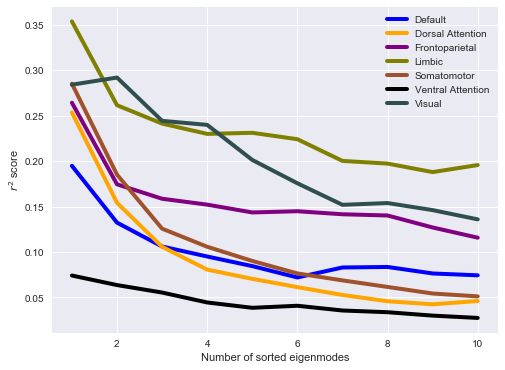

In [21]:
from cycler import cycler

r2s = np.zeros([7,10])

h5_path = path.get_file_path('laplacian_networks/Default3_BH_dice.h5')
bh_default = path.read_hdf5(h5_path)
r2s[0,:] = [bh_default['LinRegResults'][i]['r2score'] for i in range(len(bh_default['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Dorsal_Attention6_BH_dice.h5')
bh_dorsal = path.read_hdf5(h5_path)
r2s[1,:] = [bh_dorsal['LinRegResults'][i]['r2score'] for i in range(len(bh_dorsal['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Frontoparietal3_BH_dice.h5')
bh_front = path.read_hdf5(h5_path)
r2s[2,:] = [bh_front['LinRegResults'][i]['r2score'] for i in range(len(bh_front['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Limbic2_BH_dice.h5')
bh_limbic = path.read_hdf5(h5_path)
r2s[3,:] = [bh_limbic['LinRegResults'][i]['r2score'] for i in range(len(bh_limbic['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Somatomotor3_BH_dice.h5')
bh_motor = path.read_hdf5(h5_path)
r2s[4,:] = [bh_motor['LinRegResults'][i]['r2score'] for i in range(len(bh_motor['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Ventral_Attention3_BH_dice.h5')
bh_ventral = path.read_hdf5(h5_path)
r2s[5,:] = [bh_ventral['LinRegResults'][i]['r2score'] for i in range(len(bh_ventral['LinRegResults']))]

h5_path = path.get_file_path('laplacian_networks/Visual3_BH_dice.h5')
bh_visual = path.read_hdf5(h5_path)
r2s[6,:] = [bh_visual['LinRegResults'][i]['r2score'] for i in range(len(bh_visual['LinRegResults']))]

# Plot
x = np.arange(1,11)
plt.figure('Reconstruction Scores', figsize = [8,6])
custom_cycler = (cycler(color = ['blue','orange','purple','olive',
                          'sienna','black','darkslategray']))
plt.gca().set_prop_cycle(custom_cycler)
plt.plot(x, r2s.transpose(), linewidth = 4)
plt.legend(['Default','Dorsal Attention','Frontoparietal','Limbic','Somatomotor','Ventral Attention','Visual'],
          fontsize = 'medium', loc = 'upperright')
plt.xlabel('Number of sorted eigenmodes')
plt.ylabel('$r^{2}$ score')

Expand the above plot to 35 eigenmodes and DICE:

In [ ]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale

w = 2*np.pi*bh_default['x'][0]

#create brain object:
fc_brain = Brain.Brain()
fc_brain.add_connectome(hcp_dir)
fc_brain.reorder_connectome(fc_brain.connectome, fc_brain.distance_matrix)
fc_brain.bi_symmetric_c()
fc_brain.reduce_extreme_dir()

fc_brain.add_laplacian_eigenmodes(w = w, alpha = bh_default['x'][1], speed = bh_default['x'][2])
fc_brain.binary_eigenmodes = np.where(fc_brain.norm_eigenmodes > 0.6, 1, 0)
opt_dice = eigenmode.get_dice_df(fc_brain.binary_eigenmodes, DKfc_binarized)
ntw_opt_dice = np.round(opt_dice['Default'].values.astype(np.double),3)
ordered_dice = np.argsort(ntw_opt_dice)

K = 5
selected_eigs = fc_brain.norm_eigenmodes[:,ordered_dice[0:K+1]]
canon_network = np.nan_to_num(DK_df_normalized.loc['Default'].values).reshape(-1,1)
regr = LinearRegression()
regr.fit(canon_network, selected_eigs)
comb_eigmodes = np.dot(selected_eigs, np.asarray(regr.coef_))
comb_eigmodes = np.squeeze(minmax_scale(comb_eigmodes))

In [ ]:
corrs = np.zeros([86,1])
for e in np.arange(0,86):
    corrs[e] = pearsonr(np.squeeze(canon_network),fc_brain.norm_eigenmodes[:,e])[0]
    
len(corrs)

In [ ]:
from sklearn.linear_model import LinearRegression
from scipy.spatial import distance
from sklearn.preprocessing import minmax_scale
from scipy.stats import pearsonr

def compute_linreg_scores(brain, fnetworks, df_binarized, f, a, s, fc_name, num_em):
    w = 2*np.pi*f
    
    brain.add_laplacian_eigenmodes(w = w, alpha = a, speed = s)
    brain.binary_eigenmodes = np.where(brain.norm_eigenmodes > 0.6, 1, 0)
    opt_dice = eigenmode.get_dice_df(brain.binary_eigenmodes, df_binarized)
    ntw_opt_dice = np.round(opt_dice[fc_name].values.astype(np.double),3)
    ordered_dice = np.argsort(ntw_opt_dice)
    assert ntw_opt_dice[ordered_dice[1]] > ntw_opt_dice[ordered_dice[0]]
    
    cumulative_dice = np.zeros([num_em,1])
    cumulative_regr = np.zeros([num_em,1])
    cumulative_corr = np.zeros([num_em,1])
    num_canonical = np.count_nonzero(df_binarized.loc[fc_name].values)
    thresh_vec = np.linspace(0.1,0.8,30)
    binary_count = np.zeros(thresh_vec.shape)
    
    for k in np.arange(0,num_em):
        selected_eigs = brain.norm_eigenmodes[:,ordered_dice[0:k+1]]
        canon_network = np.nan_to_num(fnetworks.loc[fc_name].values).reshape(-1,1)
        regr = LinearRegression()
        regr.fit(canon_network, selected_eigs)
        # regression fit
        cumulative_regr[k] = regr.score(canon_network, selected_eigs) #r2 score
        # dice:
        comb_eigmodes = np.dot(selected_eigs, np.asarray(regr.coef_))
        comb_eigmodes = np.squeeze(minmax_scale(comb_eigmodes))
        ## binarize each combination differently:
        for i in np.arange(0,len(thresh_vec)):
            binary_mat = np.where(comb_eigmodes > thresh_vec[i],1,0)
            binary_count[i] = np.count_nonzero(binary_mat)
        
        bin_num = np.abs(binary_count - num_canonical).argmin()
        binary_comb = np.where(comb_eigmodes > thresh_vec[bin_num], 1, 0)
        print('{} element count: {}, eigenmode element count: {}'.format(fc_name, num_canonical, np.count_nonzero(binary_comb)))
        cumulative_dice[k] = 1-distance.dice(binary_comb, df_binarized.loc[fc_name].values)
        # spatial correlation
        cumulative_corr[k] = pearsonr(np.squeeze(canon_network), comb_eigmodes)[0]
        
    return np.squeeze(cumulative_regr), np.squeeze(cumulative_dice), np.squeeze(cumulative_corr)

In [ ]:
K = 35 # for number of eigenmodes
print(bh_default['x'])

#create brain object:
fc_brain = Brain.Brain()
fc_brain.add_connectome(hcp_dir)
fc_brain.reorder_connectome(fc_brain.connectome, fc_brain.distance_matrix)
fc_brain.bi_symmetric_c()
fc_brain.reduce_extreme_dir()

regr_all = np.zeros([K,7]) 
dice_all = np.zeros([K,7])
corr_all = np.zeros([K,7])
regr_all[:,0], dice_all[:,0], corr_all[:,0] = compute_linreg_scores(fc_brain, DK_df_normalized, DKfc_binarized, f = bh_default['x'][0], a = bh_default['x'][1], 
                                           s = bh_default['x'][2], fc_name = 'Default', num_em = K)

regr_all[:,1], dice_all[:,1], corr_all[:,1] = compute_linreg_scores(fc_brain, DK_df_normalized, DKfc_binarized, f = bh_dorsal['x'][0], a = bh_dorsal['x'][1], 
                                           s = bh_dorsal['x'][2], fc_name = 'Dorsal_Attention', num_em = K)

regr_all[:,2], dice_all[:,2], corr_all[:,2] = compute_linreg_scores(fc_brain, DK_df_normalized, DKfc_binarized, f = bh_front['x'][0], a = bh_front['x'][1], 
                                           s = bh_front['x'][2], fc_name = 'Frontoparietal', num_em = K)

regr_all[:,3], dice_all[:,3], corr_all[:,3] = compute_linreg_scores(fc_brain, DK_df_normalized, DKfc_binarized, f = bh_limbic['x'][0], a = bh_limbic['x'][1], 
                                           s = bh_limbic['x'][2], fc_name = 'Limbic', num_em = K)

regr_all[:,4], dice_all[:,4], corr_all[:,4] = compute_linreg_scores(fc_brain, DK_df_normalized, DKfc_binarized, f = bh_motor['x'][0], a = bh_motor['x'][1], 
                                           s = bh_motor['x'][2], fc_name = 'Somatomotor', num_em = K)

regr_all[:,5], dice_all[:,5], corr_all[:,5] = compute_linreg_scores(fc_brain, DK_df_normalized, DKfc_binarized, f = bh_ventral['x'][0], a = bh_ventral['x'][1], 
                                           s = bh_ventral['x'][2], fc_name = 'Ventral_Attention', num_em = K)

regr_all[:,6], dice_all[:,6], corr_all[:,6] = compute_linreg_scores(fc_brain, DK_df_normalized, DKfc_binarized, f = bh_visual['x'][0], a = bh_visual['x'][1], 
                                           s = bh_visual['x'][2], fc_name = 'Visual', num_em = K)
# Plot
x = np.arange(1,K+1)
plt.figure('Reconstruction Scores', figsize = [10,8])
plt.subplot(3,1,1)
custom_cycler = (cycler(color = ['blue','orange','purple','olive',
                          'sienna','black','darkslategray']))
plt.gca().set_prop_cycle(custom_cycler)
plt.plot(x, regr_all, linewidth = 4)
plt.xlabel('Number of sorted eigenmodes')
plt.ylabel('$r^{2}$ score')

plt.subplot(3,1,2)
plt.gca().set_prop_cycle(custom_cycler)
plt.plot(x, dice_all, linewidth = 4)
plt.xlabel('Number of sorted eigenmodes')
plt.ylabel('DICE similarity score')

plt.subplot(3,1,3)
plt.gca().set_prop_cycle(custom_cycler)
plt.plot(x, corr_all, linewidth = 4)
plt.xlabel('Number of sorted eigenmodes')
plt.ylabel('Pearson R')
plt.legend(['Default','Dorsal Attention','Frontoparietal','Limbic','Somatomotor','Ventral Attention','Visual'],
          fontsize = 'large', loc = 'center left',  bbox_to_anchor=(1, 0.5))

In [ ]:
# Compute eigenmode dice with Brain:
dft_brain = Brain.Brain()
dft_brain.add_connectome(hcp_dir)
dft_brain.reorder_connectome(dft_brain.connectome, dft_brain.distance_matrix)
dft_brain.bi_symmetric_c()
dft_brain.reduce_extreme_dir()

# complex laplacian and its eigenmodes:
w = 2*np.pi*bh_default['x'][0]
dft_brain.add_laplacian_eigenmodes(w, alpha = bh_default['x'][1], speed = bh_default['x'][2])

# binarize and compute dice:
dft_brain.binary_eigenmodes = np.where(dft_brain.norm_eigenmodes > 0.6, 1, 0)
dft_dice = eigenmode.get_dice_df(dft_brain.binary_eigenmodes, DKfc_binarized)
# Compute mean Dice for chosen network:
dice_scores = 1-np.round(dft_dice['Default'].values.astype(np.double),3)
mean_dice = np.mean(dice_scores)
print("mean dice dissimilarity score: ", mean_dice)

In [ ]:
np.min(dice_scores)

In [ ]:
ordered_dice = np.argsort(dice_scores)
ordered_dice

In [ ]:
dice_scores[78]

In [ ]:
from nilearn import plotting
from matplotlib import cm

## Function for plotting with nilearn
def plot_glass_brain(coords, scores, cmap_name):
    """ Plot transparent brain renders
    Args:
        - color (list): Color indices
        - coords 
        - size
    Returns:
        -matplotlib object
    """
    cmap = cm.get_cmap(cmap_name)
    data = np.nan_to_num(scores)
    size = data*500
    #color = cmap((size/np.max(size)))
    color = cmap(data)
    connectome_array = np.array([[0]*86]*86)
    plotting.plot_connectome(connectome_array, coords, node_size = size, node_color = color, display_mode = 'xz')
    plt.gcf().set_size_inches(10, 5)

# plot:
plt.figure('Default System', figsize = [10,8])
plt.hist(dice_scores, bins = 8, density = True, histtype = 'bar')
xvals = plt.xticks()[0]
xmin, xmax = min(xvals), max(xvals)
xbins = np.linspace(xmin, xmax, len(dice_scores))
mu, sigma = stats.norm.fit(dice_scores)
gaussian_pdf = stats.norm.pdf(xbins, mu, sigma)
plt.plot(xbins, gaussian_pdf,'r', label = 'Gaussian Fit')

In [ ]:
np.argmax(dice_scores)

In [ ]:
binarized_eig = np.where(dft_brain.norm_eigenmodes[:,52] > 0.6, 1, 0)
np.round(dft_brain.norm_eigenmodes[:,52],2)

In [ ]:
np.round(DK_df_normalized.loc['Default'].values,2)

In [ ]:
from scipy.spatial import distance
u = np.mean(np.nan_to_num(DK_df_normalized.loc['Default'].values))
s = np.std(np.nan_to_num(DK_df_normalized.loc['Default'].values))
threshold = u - s * 0.1
distance.dice(np.where(dft_brain.norm_eigenmodes[:,61]>0.6,1,0), np.where(np.nan_to_num(DK_df_normalized.loc['Default'].values)>threshold,1,0))

In [ ]:
coords = np.array([com_dk[region] for region in DK_df_normalized.columns])
eigscore = dft_brain.norm_eigenmodes[:,61]
plot_glass_brain(coords, eigscore, 'coolwarm')

In [ ]:
np.arange(1,11)

Trying linear regression:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

k = 5 # number of top eigen modes to regress:
Y = dft_brain.norm_eigenmodes[:,ordered_dice[0:k]]
X = np.nan_to_num(DK_df_normalized.loc['Default'].values).reshape(-1,1)
regr = LinearRegression()
regr.fit(X,Y)
print(regr.score(X,Y))

In [ ]:
from sklearn.preprocessing import minmax_scale
lin_comb_y = np.dot(Y,np.asarray(regr.coef_))
scaled_y = np.squeeze(minmax_scale(lin_comb_y))

In [ ]:
plot_glass_brain(coords, np.asarray(scaled_y), 'coolwarm')

In [ ]:
a = np.array([[[1]*2]*5])
b = np.array([1,2])
print(a)
print(b.shape)
np.dot(a,b)

In [ ]:
%gui qt

# set up Pysurfer variables
subject_id = "fsaverage"
hemi = "split"
surf = "inflated"

"""
Bring up the visualization.
"""
#brain = Brain(subject_id, hemi , surf, background="white", views = ['lat','med'])
dft_SB = SB(subject_id, hemi, surf, background = "white", title = "Default freq = 4.5, alpha = 5.3, v = 8.2", views=['lat', 'med'])
#limb_SB.add_text(x = 0.5, y = 0.9, text = "Eig Number , frequency = , speed = ", name = "eiglabel")

"""
Read in the automatic parcellation of sulci and gyri.
"""

# left side:
hemi_side = "lh"
aparc_file = os.path.join(os.environ["SUBJECTS_DIR"],
                          subject_id, "label",
                          hemi_side + ".aparc.annot")
labels, ctab, names = nib.freesurfer.read_annot(aparc_file)
lh_norm_eigs = dft_brain.norm_eigenmodes[:,np.argmin(dice_scores)]
lh_padded_eigs = np.insert(lh_norm_eigs, [0, 3], [0, 0])
dft_lh = lh_padded_eigs[labels]
dft_SB.add_data(dft_lh, hemi = 'lh', thresh = 0, colormap = "jet", remove_existing = True)

hemi_side = "rh"
aparc_file = os.path.join(os.environ["SUBJECTS_DIR"],
                          subject_id, "label",
                          hemi_side + ".aparc.annot")
labels, ctab, names = nib.freesurfer.read_annot(aparc_file)

rh_norm_eigs = dft_brain.norm_eigenmodes[34:68,np.argmin(dice_scores)]
rh_padded_eigs = np.insert(rh_norm_eigs, [0,3],[0,0])
dft_rh = rh_padded_eigs[labels]
dft_SB.add_data(dft_rh, hemi = 'rh', thresh = 0, colormap = "jet", remove_existing = True)

In [ ]:
print(np.min(dice_scores))

#### Dorsal attention network

In [ ]:
# load results:
h5_path = path.get_file_path('Dorsal_Attention_BH_dice.h5')
bh_dorattn = path.read_hdf5(h5_path)
bh_dorattn

#### Frontoparietal

In [ ]:
h5_path = path.get_file_path('Frontoparietal_BH_dice.h5')
bh_ftpt = path.read_hdf5(h5_path)
bh_ftpt

#### Limbic

In [ ]:
h5_path = path.get_file_path('Limbic_BH_dice.h5')
bh_limb = path.read_hdf5(h5_path)
bh_limb

Plot eigenmode dice dissimilarity scores:

In [ ]:
# Compute eigenmode dice with Brain:
limbic = Brain.Brain()
limbic.add_connectome(hcp_dir)
limbic.reorder_connectome(limbic.connectome, limbic.distance_matrix)
limbic.bi_symmetric_c()
limbic.reduce_extreme_dir()

# complex laplacian and its eigenmodes:
w = 2*np.pi*bh_limb['x'][0]
limbic.add_laplacian_eigenmodes(w, alpha = bh_limb['x'][1], speed = bh_limb['x'][2])

# binarize and compute dice:
limbic.binary_eigenmodes = np.where(limbic.norm_eigenmodes > 0.6, 1, 0)
limbic_dice = eigenmode.get_dice_df(limbic.binary_eigenmodes, DKfc_binarized)
# Compute mean Dice for chosen network:
dice_scores = 1-np.round(limbic_dice['Limbic'].values.astype(np.double),3)
mean_dice = np.mean(dice_scores)
print("mean dice dissimilarity score: ", mean_dice)

# plot:
plt.figure('Limbic System')
plt.hist(dice_scores, bins = 8, density = True, histtype = 'bar')
xvals = plt.xticks()[0]
xmin, xmax = min(xvals), max(xvals)
xbins = np.linspace(xmin, xmax, len(dice_scores))
mu, sigma = stats.norm.fit(dice_scores)
gaussian_pdf = stats.norm.pdf(xbins, mu, sigma)
plt.plot(xbins, gaussian_pdf,'r', label = 'Gaussian Fit')

In [ ]:
np.argmin(dice_scores)

In [ ]:
eigscore = limbic.norm_eigenmodes[:,np.argmin(dice_scores)]
plot_glass_brain(coords, eigscore, 'coolwarm')

Render brain for best dice score:

In [ ]:
%gui qt

# set up Pysurfer variables
subject_id = "fsaverage"
hemi = "split"
surf = "inflated"

"""
Bring up the visualization.
"""
#brain = Brain(subject_id, hemi , surf, background="white", views = ['lat','med'])
limb_SB = SB(subject_id, hemi, surf, background = "white", title = "Limbic freq = 4.5, alpha = 5.3, v = 8.2", views=['lat', 'med'])
#limb_SB.add_text(x = 0.5, y = 0.9, text = "Eig Number , frequency = , speed = ", name = "eiglabel")

"""
Read in the automatic parcellation of sulci and gyri.
"""

# left side:
hemi_side = "lh"
aparc_file = os.path.join(os.environ["SUBJECTS_DIR"],
                          subject_id, "label",
                          hemi_side + ".aparc.annot")
labels, ctab, names = nib.freesurfer.read_annot(aparc_file)
lh_norm_eigs = limbic.norm_eigenmodes[:,np.argmax(dice_scores)]
lh_padded_eigs = np.insert(lh_norm_eigs, [0, 3], [0, 0])
limb_lh = lh_padded_eigs[labels]
limb_SB.add_data(limb_lh, hemi = 'lh', thresh = 0, colormap = "jet", remove_existing = True)

hemi_side = "rh"
aparc_file = os.path.join(os.environ["SUBJECTS_DIR"],
                          subject_id, "label",
                          hemi_side + ".aparc.annot")
labels, ctab, names = nib.freesurfer.read_annot(aparc_file)

rh_norm_eigs = limbic.norm_eigenmodes[34:68,np.argmax(dice_scores)]
rh_padded_eigs = np.insert(rh_norm_eigs, [0,3],[0,0])
limb_rh = rh_padded_eigs[labels]
limb_SB.add_data(limb_rh, hemi = 'rh', thresh = 0, colormap = "jet", remove_existing = True)